In [11]:
import os
os.chdir('C:/Users/vivek/OneDrive/Desktop/Rhombus Power')

In [1]:
!pip install netCDF4

You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import re
from IPython.display import display
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [3]:
from netCDF4 import Dataset

# Question 1

In [22]:
np.random.seed(2020)

In [24]:
df=pd.read_excel('ged201.xlsx')

In [25]:
df.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31,0,4,0,2,6,6,6,645,NaN
1,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13,6,0,0,0,6,6,6,700,NaN
2,130364,AFG-1989-1-411-37,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-18,0,0,0,4,4,4,0,700,NaN
3,130359,AFG-1989-1-411-4,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-24,0,0,0,600,600,600,600,700,NaN
4,133883,AFG-1989-1-411-39,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-02-05,0,0,0,2,2,2,0,700,NaN


Build your curated database from the UCDP raw data where you find all events occurred in Afghanistan, specifically for three districts called Kunduz, Ghazni, and Kabul

In [26]:
df1= df[(df.adm_2=='Kabul district')|(df.adm_2=='Kunduz district')|(df.adm_2=='Ghazni district') ]

In [27]:
df1.shape

(1541, 49)

In [28]:
df1.adm_2.value_counts()

Kabul district     992
Kunduz district    299
Ghazni district    250
Name: adm_2, dtype: int64

In [30]:
df1.head().T

,0,4,7,9,10
id,244657,133883,133888,133892,133898
relid,IRQ-2017-1-524-322,AFG-1989-1-411-39,AFG-1989-1-411-40,AFG-1989-1-411-7,AFG-1989-1-411-8
year,2017,1989,1989,1989,1989
active_year,1,1,1,1,1
code_status,Clear,Clear,Clear,Clear,Clear
type_of_violence,1,1,1,1,1
conflict_dset_id,259,333,333,333,333
conflict_new_id,259,333,333,333,333
conflict_name,Iraq: Government,Afghanistan: Government,Afghanistan: Government,Afghanistan: Government,Afghanistan: Government
dyad_dset_id,524,724,724,724,724


In your database, you want to curate monthly total number of events and total number of people affected (use column name “BEST” in the raw data)

In [110]:
def add_datepart(df, fldname, drop=False, time=False):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [111]:
df1['month_year'] = pd.to_datetime(df1['date_end']).dt.to_period('M')

In [112]:
add_datepart(df1,'date_end')

In [113]:
df1.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob', 'month_year', 'date_endYear', 'date_endMonth',
       'date_endWeek', 'date_endDay', 'date_endElapsed'],
      dtype='object')

In [114]:
events=df1.groupby(['adm_2','month_year'])['best'].sum().to_frame()

In [115]:
events.reset_index(inplace=True)

In [116]:
events.head(4)

,adm_2,month_year,best
0,Ghazni district,1989-02,6
1,Ghazni district,1989-05,0
2,Ghazni district,2003-11,1
3,Ghazni district,2005-08,1


In [117]:
events.shape  

(472, 3)

In [118]:
events['month_year'] = events.month_year.values.astype('datetime64[M]')

In [119]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 3 columns):
adm_2         472 non-null object
month_year    472 non-null datetime64[ns]
best          472 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.2+ KB


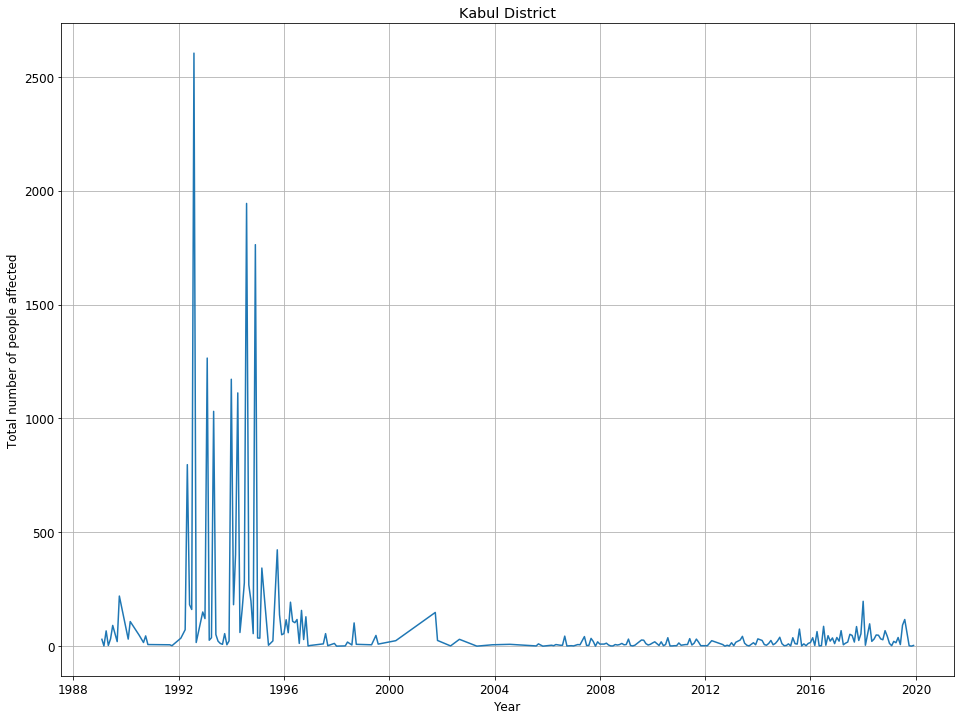

In [120]:

plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(16, 12))
dx=events[events.adm_2=='Kabul district']
ax.plot(dx.month_year, dx.best, label='Kabul district')

  # Same as above
ax.set_xlabel('Year')
ax.set_ylabel('Total number of people affected')
ax.set_title('Kabul District')
ax.grid(True)





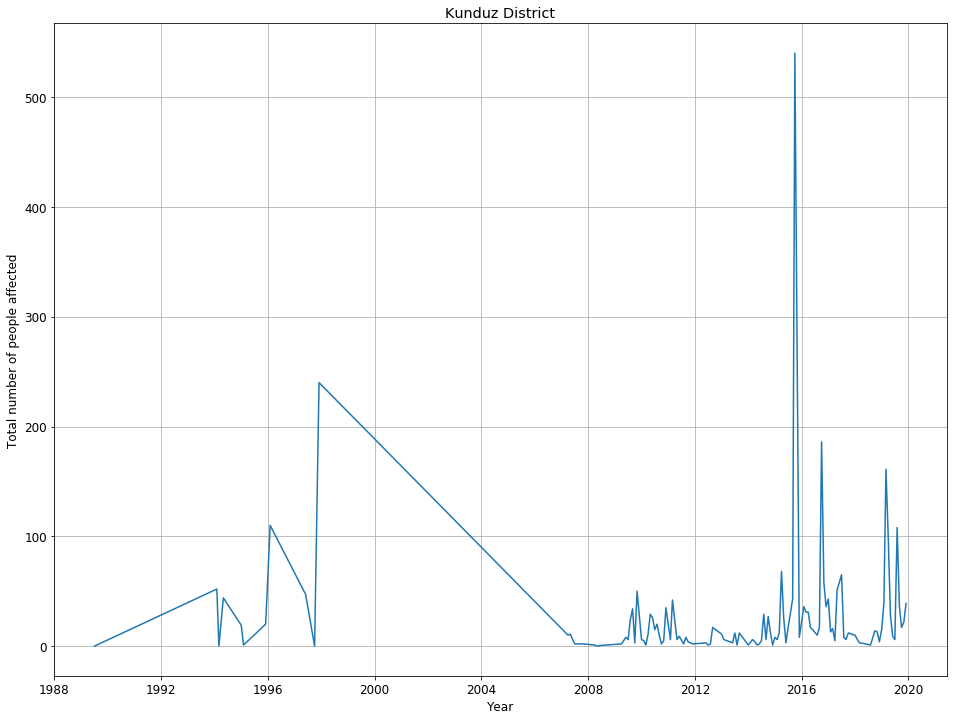

In [121]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(16, 12))


dx=events[events.adm_2=='Kunduz district']
ax.plot(dx.month_year, dx.best, label='Kunduz district')

# Same as above
ax.set_xlabel('Year')
ax.set_ylabel('Total number of people affected')
ax.set_title('Kunduz District')
ax.grid(True)
 

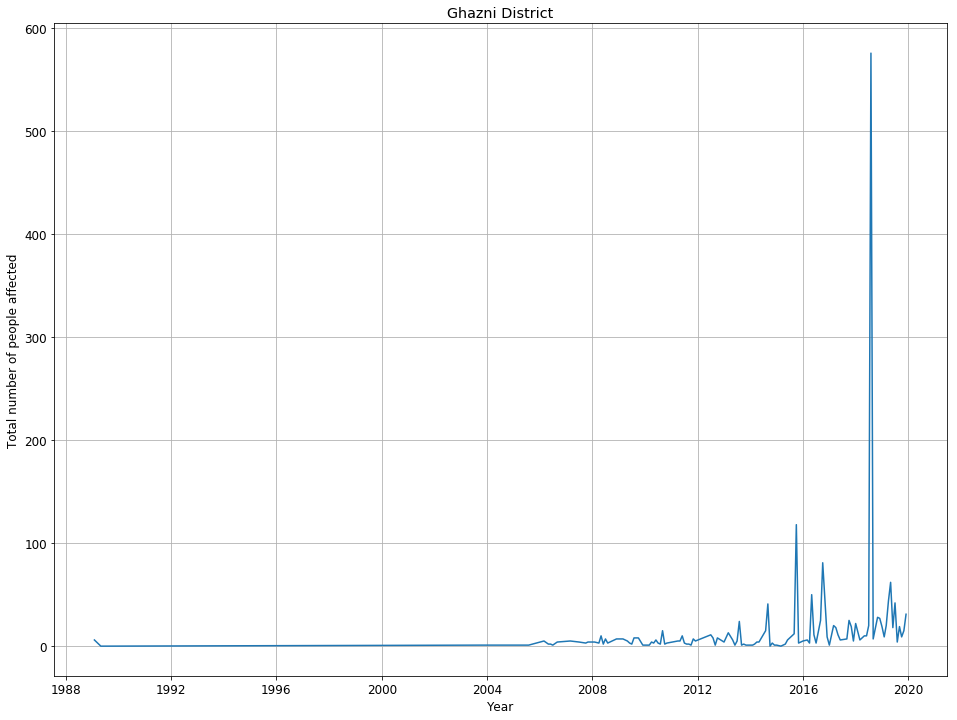

In [122]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(16, 12))



dx=events[events.adm_2=='Ghazni district']
ax.plot(dx.month_year, dx.best, label='Ghazni district')

  # Same as above
ax.set_xlabel('Year')
ax.set_ylabel('Total number of people affected')
ax.set_title('Ghazni District')
ax.grid(True)
 

# Question 2

I am going to use data from 2011-2019

In [196]:
#minimum temp
filename = "cru_ts4.04.2011.2019.tmn.dat.nc" # the location of the data
tmn = Dataset(filename)

In [197]:
#average temp
filename = "cru_ts4.04.2011.2019.tmp.dat.nc" # the location of the data
tmp = Dataset(filename)

In [198]:
#max temp
filename = "cru_ts4.04.2011.2019.tmx.dat.nc" # the location of the data
tmx = Dataset(filename)

In [199]:
# precipitation
filename = "cru_ts4.04.2011.2019.pre.dat.nc" # the location of the data
pre = Dataset(filename)

In [200]:
x=events[events.adm_2=='Kabul district']
x=list(x.best)
x=x[-108:]

#Minimum temp

In [201]:
print(data.variables.keys())

dict_keys(['lon', 'lat', 'time', 'tmn', 'stn'])


In [202]:
#latitude
lat = tmn.variables['lat'][:] 
#Longtitide
lon = tmn.variables['lon'][:]
#time
time = tmn.variables['time'][:]
#minimum temp
tmn = tmn.variables['tmn'][:]

In [203]:
kabul_lati=34.5311
kabul_long=69.1628

In [204]:
#To find index of kabul
lat_index_kabul=np.argmin(abs(lat-kabul_lati))
long_index_kabul=np.argmin(abs(lon-kabul_long))

In [205]:
lat_index_kabul,long_index_kabul

(249, 498)

In [206]:
#Temperature minimum for kabul district
kabul_tmn=tmn[:,lat_index_kabul,long_index_kabul]

In [207]:
type(kabul_tmn)

numpy.ma.core.MaskedArray

In [208]:
len(kabul_tmn)

108

In [209]:
kabul_tmn[:3]

masked_array(data=[-7.800000190734863, -6.0, 0.9000000357627869],
             mask=[False, False, False],
       fill_value=9.96921e+36,
            dtype=float32)

In [210]:
def x_axis_date():
    time=[]
    start=np.datetime64("2011-01")
    end=np.datetime64("2019-12")
    while start<=end:
        time.append(start)
        start=start+ np.timedelta64(1,'M')    
    return time

In [211]:
x_axis=x_axis_date() 

In [212]:
len(x_axis)

108

Text(0, 0.5, 'Minimum Temperature of Kabul')

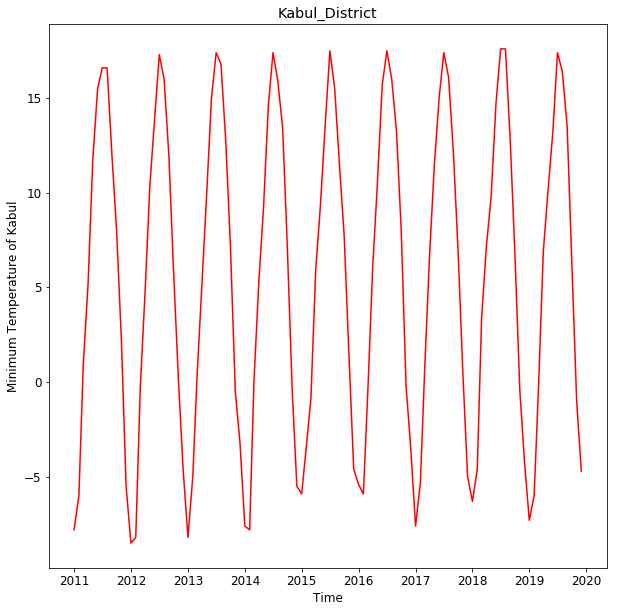

In [213]:
# Plot minimum temperature of Kabul
plt.figure(figsize=(10,10))
plt.plot(x_axis, kabul_tmn, color='red')
plt.title('Kabul_District')
plt.xlabel('Time')
plt.ylabel('Minimum Temperature of Kabul')

# Corelation between temp min and events in kabul

In [214]:
import scipy.stats
from scipy import stats

In [215]:
y=kabul_tmn

In [216]:
correlation, p_value = stats.pearsonr(x, y)

In [217]:
correlation, p_value

(0.11373638163085514, 0.24118219659875653)

# Maximum Temperature

In [219]:
tmx = tmx.variables['tmx'][:]

#Temperature maximum for kabul district
kabul_tmx=tmx[:,lat_index_kabul,long_index_kabul]


Text(0, 0.5, 'Maximum Temperature of Kabul')

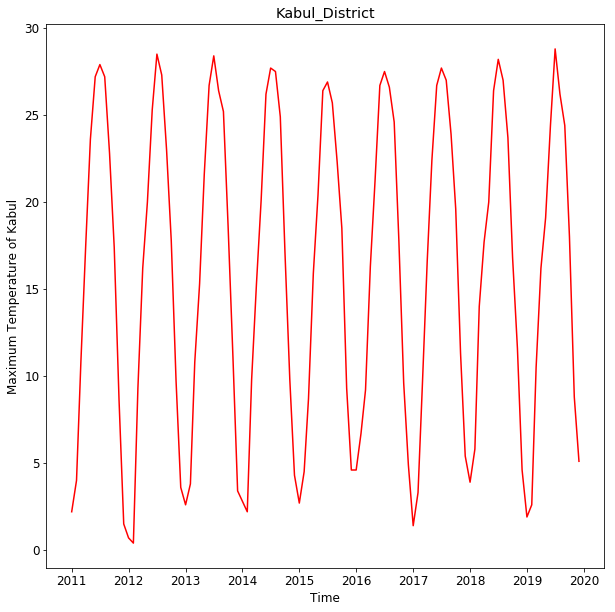

In [220]:
# Plot maximum temperature of Kabul
plt.figure(figsize=(10,10))
plt.plot(x_axis, kabul_tmx, color='red')
plt.title('Kabul_District')
plt.xlabel('Time')
plt.ylabel('Maximum Temperature of Kabul')


# Corelation between temp max and events in kabul

In [221]:
y=kabul_tmx

In [222]:
correlation, p_value = stats.pearsonr(x, y)
correlation, p_value

(0.08795271360488172, 0.36538522822307473)

In [223]:
correlation, p_value = stats.spearmanr(x, y)
correlation, p_value

(-0.005302115100693281, 0.9565683532045455)

# Average temperature

In [224]:
tmp = tmp.variables['tmp'][:]

#Average Temperature for kabul district
kabul_tmp=tmp[:,lat_index_kabul,long_index_kabul]


Text(0, 0.5, 'Temperature of Kabul')

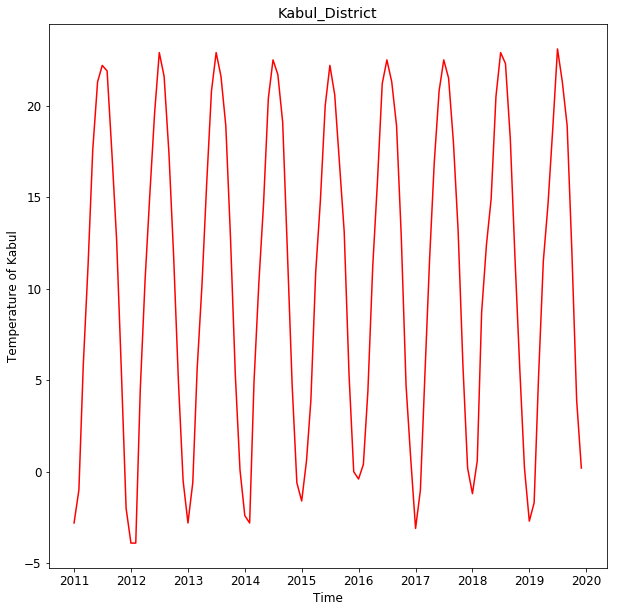

In [225]:
# Plot minimum temperature of Kabul
plt.figure(figsize=(10,10))
plt.plot(x_axis, kabul_tmp, color='red')
plt.title('Kabul_District')
plt.xlabel('Time')
plt.ylabel('Temperature of Kabul')


# Correlation between Average temp and events in kabul

In [226]:
y=kabul_tmp

In [227]:
correlation, p_value = stats.pearsonr(x, y)
correlation, p_value

(0.08089769132608805, 0.40524183355543275)

In [228]:
correlation, p_value = stats.spearmanr(x, y)
correlation, p_value

(-0.017552661392787605, 0.8569139926304915)

# precipitation

In [229]:
pre = pre.variables['pre'][:]

#Temperature minimum for kabul district
kabul_pre=tmn[:,lat_index_kabul,long_index_kabul]

Text(0, 0.5, 'pre of Kabul')

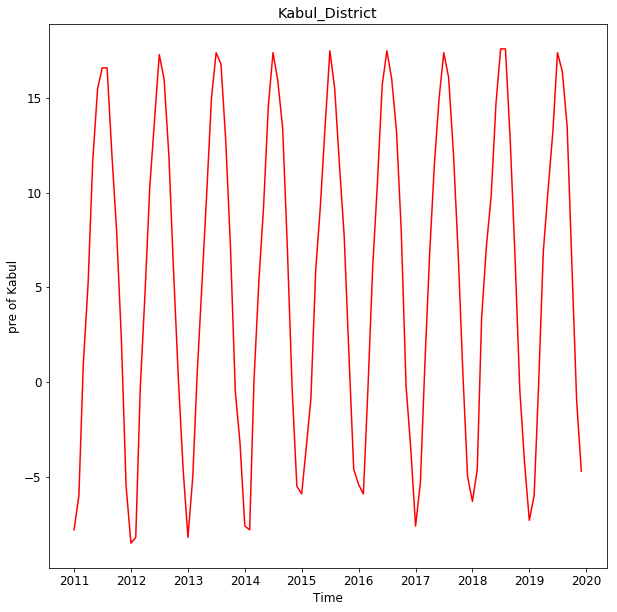

In [230]:
# Plot minimum temperature of Kabul
plt.figure(figsize=(10,10))
plt.plot(x_axis, kabul_pre, color='red')
plt.title('Kabul_District')
plt.xlabel('Time')
plt.ylabel('pre of Kabul')


# Correlation between precipitation and events in kabul

In [231]:
y=kabul_pre

In [232]:
correlation, p_value = stats.pearsonr(x, y)
correlation, p_value

(0.0729120326705055, 0.45331134057861533)

In [233]:
correlation, p_value = stats.spearmanr(x, y)
correlation, p_value

(-0.030835894421926073, 0.7513934791314325)

# Question 3

# Design your hypothesis test if there is correlation/association between conflict and climate variables in each of districts

# What are your statistical metrics to reject/accept your hypothesis?

Correlation and p-value are my statistical metrics for the Hypothesis
I have used Covariance and Pearson coefficient.


Covariance:
The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) 
or change in different directions (negative). The magnitude of the covariance is not easily interpreted.
A covariance value of zero indicates that both variables are completely independent.


Pearson’s Correlation:
The Pearson correlation coefficient can be used to summarize the strength of the linear relationship between two data samples.
The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation 
to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, 
where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values 
suggests a less notable correlation.

# What is your conclusion on the correlation/association between conflict and climate variables in each of districts given your statistical metrics

Null Hypothesis: There is a correlation/association between conflict and climate variables in Kabul district
Alternate Hypothesis: There is no correlation/association between conflict and climate variables in Kabul district

In all the cases (max temerature, min temperature, average temperature, precipitation) the value is greater than 0.05.
We can fail to reject the Null Hypothesis.

Secondly, Covariance correlation and Pearson correlation coefficient are around zero.

Hence, There is no correlation between conflict and climate variables in Kabul district

Future Work:
We can run regression between conflict and climate variables in Kabul district to find out relation between those two variables.
We can find trend and seasonality of the temperature and precipitation and do regression.

# Reference:
1. https://help.ceda.ac.uk/article/4728-cru-data-python-example
2. https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
3. Stackoverflow